In [12]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm, skew
%matplotlib inline

In [13]:
# Import train and test datasets
train = pd.read_csv("../Data/House_Prices/train.csv")
test = pd.read_csv("../Data/House_Prices/test.csv")

In [14]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [15]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [17]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [18]:
# Drop Columns
to_drop = ["Id","Utilities"]
print("Shape before deleting "+str(to_drop)+" columns is \n train: {first} \n test: {second}".format(first=train.shape, second=test.shape))
for i in to_drop:
    train.drop(i, axis=1, inplace=True)
    test.drop(i, axis=1, inplace=True)
print("Shape after deleting "+str(to_drop)+" columns is \n train: {first} \n test: {second}".format(first=train.shape, second=test.shape))

Shape before deleting ['Id', 'Utilities'] columns is 
 train: (1460, 81) 
 test: (1459, 80)
Shape after deleting ['Id', 'Utilities'] columns is 
 train: (1460, 79) 
 test: (1459, 78)


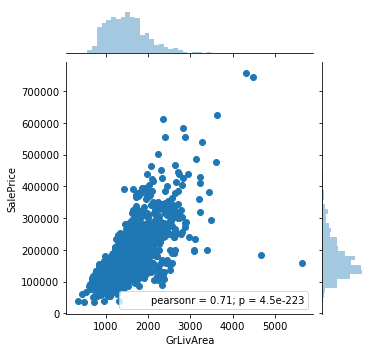

In [19]:
#Explore and Remove outliers
sns.jointplot(x="GrLivArea", y="SalePrice", data=train, size=5)
train = train.drop(train[( train["GrLivArea"]>4000) & (train["SalePrice"]<300000) ].index)

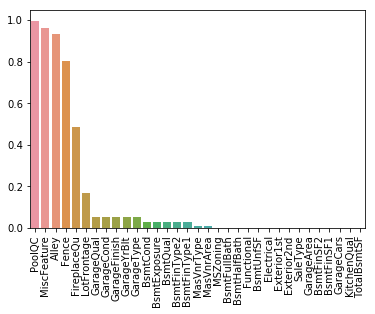

In [23]:
## Feature Engineering

# Concatenating train and test data to do clean the data
dataset = pd.concat((train, test))
dataset.drop(["SalePrice"], axis=1, inplace=True)
# Checking missing data ratio
missing_data = (dataset.isnull().sum()/len(dataset))
missing_data = missing_data[missing_data > 0.000].dropna()
missing_data = missing_data.sort_values(ascending=False)
missing_data.head(10)
ax = sns.barplot(x=missing_data.index, y=missing_data.values)
ax.set_xticklabels(missing_data.index,rotation=90)

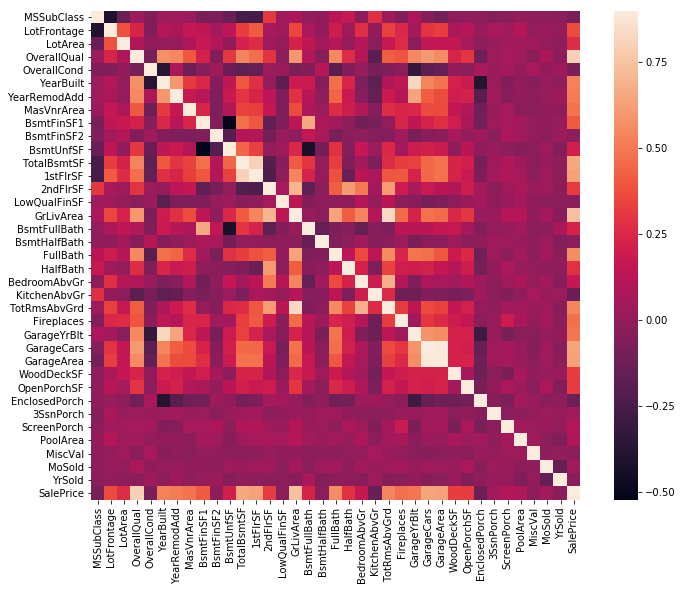

In [24]:
# Find correlations in the dataset
corr = train.corr()
plt.subplots(figsize= (12,9))
sns.heatmap(corr, vmax=0.9, square=True)

In [25]:
# Imputing missing values
to_impute = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PoolQC',
             "MiscFeature", "Alley", "Fence", "FireplaceQu",'BsmtQual', 
             'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             "MasVnrType"]
for col in  to_impute:
    dataset[col] = dataset[col].fillna('None')

to_impute_zero = ['GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 
                  'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 
                  'BsmtHalfBath', "MasVnrArea"]
for col in  to_impute_zero:
    dataset[col] = dataset[col].fillna(0)

dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])
dataset["Functional"] = dataset["Functional"].fillna("Typ")
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])
dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])
dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])
dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])
dataset['MSSubClass'] = dataset['MSSubClass'].fillna("None")

# Check datatypes of features
print(dataset.dtypes)

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotConfig         object
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object


In [26]:
# Convert relevant numeric variables to categorical datatypes
to_str = ["MSSubClass", "OverallCond", "YrSold", "MoSold"]
for i in to_str:
    dataset[i] = dataset[i].astype(str)

# Convert all Object datatyes to categorical datatypes
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    labelencoder = LabelEncoder()
    dataset[c] = labelencoder.fit_transform(list(dataset[c].values))

# Adding total Sqft for the house
dataset["TotalSF"] = dataset["TotalBsmtSF"] + dataset["1stFlrSF"] + dataset["2ndFlrSF"]

# Skewness of all numeric variables
numeric_features = dataset.dtypes[dataset.dtypes != "object"].index
skew_numeric = dataset[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\n skew in numeric features: \n")
skewness = pd.DataFrame({"skew" :skew_numeric})
skewness.head(10)


 skew in numeric features: 



,skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [28]:
# Getting dummy categorical features for all "object" datatypes
dataset = pd.get_dummies(dataset)

# Split train and test from dataset since feature profiling is completed
X = dataset[:train.shape[0]]
y = train["SalePrice"]
X_final_test = dataset[train.shape[0]:]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Standardising variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_final_test_std = sc.transform(X_final_test)

In [29]:
######## Let's try XGboost algorithm
import xgboost as xgb
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.09, gamma=0, 
                       subsample=0.75, max_depth=7)

xgb.fit(X_train_std, y_train)

print(xgb.score(X_train_std, y_train))
print(xgb.score(X_test_std, y_test))

C:\Users\raviy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.996711015012
0.902105376123


In [ ]:
# Applying Grid Search for XGBoost
from sklearn.model_selection import GridSearchCV
parameters = [{ "n_estimators": [5,50,100,120,150], "gamma": [0,0.02,0.03,0.04,0.05], 
               "subsample":  [0.05, 0.20, 0.70, 0.90, 1], "max_depth": [1,5,10,15,50] }]

grid_search = GridSearchCV(estimator = xgb, param_grid = parameters,
                            cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy_xgb = grid_search.best_score_
best_parameters_xgb = grid_search.best_params_
print("best parameters for our xgboost model{}".format(best_parameters_xgb))
print("best accuracy score with ideal parameters: {}".format(best_accuracy_xgb))

In [ ]:
# Test Cross Validation score
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)
print("Mean accuracy score for our XGB model is: {:.2f}".format(accuracies.mean()))
print("Std deviation for our XGB accuracy score is: {:.2f}".format(accuracies.std()))

In [ ]:
###### Testing Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_std, y_train)
print(regressor.score(X_train_std, y_train))
print(regressor.score(X_test_std, y_test))

In [ ]:
# Test Cross validation for random forest model
from sklearn.model_selection import cross_val_score
accuracies_regressor = cross_val_score(estimator= regressor, X = X_train, y= y_train, cv=10)
print("Mean accuracy score for our regressor model is: {:.2f}".format(accuracies_regressor.mean()))
print("Std deviation for our regressor accuracy score is: {:.2f}".format(accuracies_regressor.std()))

In [ ]:
# Apply grid selection to find the best parameters
from sklearn.model_selection import GridSearchCV
parameters_regressor = [{ "n_estimators": [500,1000,5000], 
               "max_features":  ["auto"] }]

grid_search_regressor = GridSearchCV(estimator = regressor, param_grid = parameters_regressor,
                            cv = 10, n_jobs = -1)
grid_search_regressor = grid_search_regressor.fit(X_train, y_train)
best_accuracy_regressor = grid_search_regressor.best_score_
best_parameters_regressor = grid_search_regressor.best_params_
print("best parameters for our regressor model: {}".format(best_parameters_regressor))
print("best accuracy score with ideal parameters: {}".format(best_accuracy_regressor))